# project title:-  LOAN ELIGIBLITY PREDICTION

# problem staements

This is a classification problem in which we need to classify whether the loan will be approved or not.                 
Loan status can have two values: Yes or NO.                         
Yes: if the loan is approved         
No: if the loan is not approved 

# The dataset consists of the following variables:          
           
Loan_ID : Unique Loan ID         
Gender : Male/ Female            
Married : Applicant married (Y/N)           
Dependents : Number of dependents ( are people who are financially (and otherwise) dependent on you)            
Education : Applicant Education (Graduate/ Under Graduate)               
Self_Employed : Self employed (Y/N)                
ApplicantIncome : Applicant income              
CoapplicantIncome : Coapplicant income (is an individual who applies for a loan with another person)                              
LoanAmount : Loan amount in thousands of dollars            
Loan_Amount_Term : Term of loan in months                   
Credit_History : credit history meets guidelines yes or no                 
Property_Area : Urban/ Semi Urban/ Rural                         
Loan_Status : Loan approved (Y/N) this is the target variable                                        


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ( 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    
    ConfusionMatrixDisplay, 
    classification_report,
    precision_score,
    recall_score
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\Admin\\Downloads/Dataset.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

# find missing value ,fill or drop

In [4]:
data.isnull().sum()                     #find null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data=data.drop("Loan_ID",axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data["LoanAmount"].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [9]:
  #mode
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# label encoding for categorical variable

In [11]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Married=le.fit_transform(data.Married)
data.Education=le.fit_transform(data.Education)
data.Self_Employed=le.fit_transform(data.Self_Employed)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)
data.Dependents.replace({"0":"0","1":"1","2":"2","3+":"3"},inplace=True)
data.Dependents=le.fit_transform(data.Dependents)

In [13]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# scatter plot

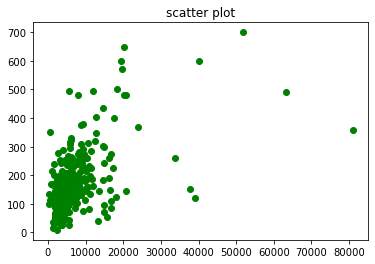

In [14]:
a=data["ApplicantIncome"]
b=data["LoanAmount"]
plt.title("scatter plot")
plt.scatter(a,b,color="Green")
plt.show()

In [15]:
#there is a positive correlation  between   ApplicantIncome AND loanAmount

# Pie chart

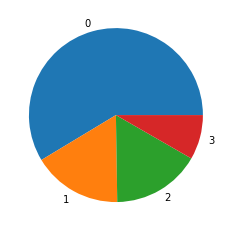

In [16]:
x=data["Dependents"].value_counts()
y=["0","1","2","3"]
plt.pie(x,labels=y)
plt.show()

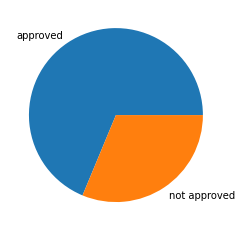

In [17]:
x=data["Loan_Status"].value_counts()
y=["approved","not approved"]
plt.pie(x,labels=y)
plt.show()

# count plot

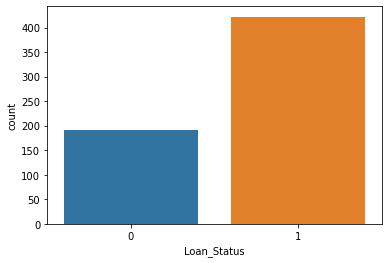

In [18]:
sns.countplot("Loan_Status",data=data)
plt.show()

In [19]:
x=pd.crosstab(data["Credit_History"],data["Loan_Status"])
x

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


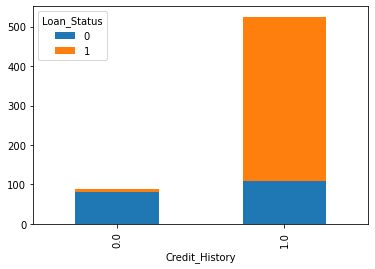

In [20]:
x.plot(kind="bar",stacked=True)
plt.show()

In [21]:
y=pd.crosstab(data["Gender"],data["Loan_Status"])
y

Loan_Status,0,1
Gender,,
0,37,75
1,155,347


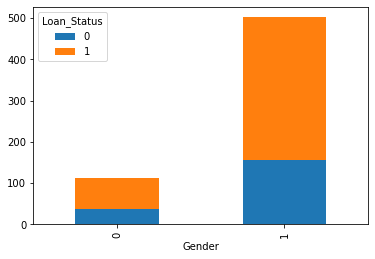

In [22]:
y.plot(kind="bar",stacked=True)
plt.show()

In [23]:
y=pd.crosstab(data["Dependents"],data["Loan_Status"])
y

Loan_Status,0,1
Dependents,,
0,113,247
1,36,66
2,25,76
3,18,33


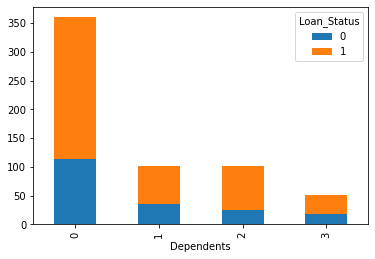

In [24]:
y.plot(kind="bar",stacked=True)
plt.show()

# Outliers treating

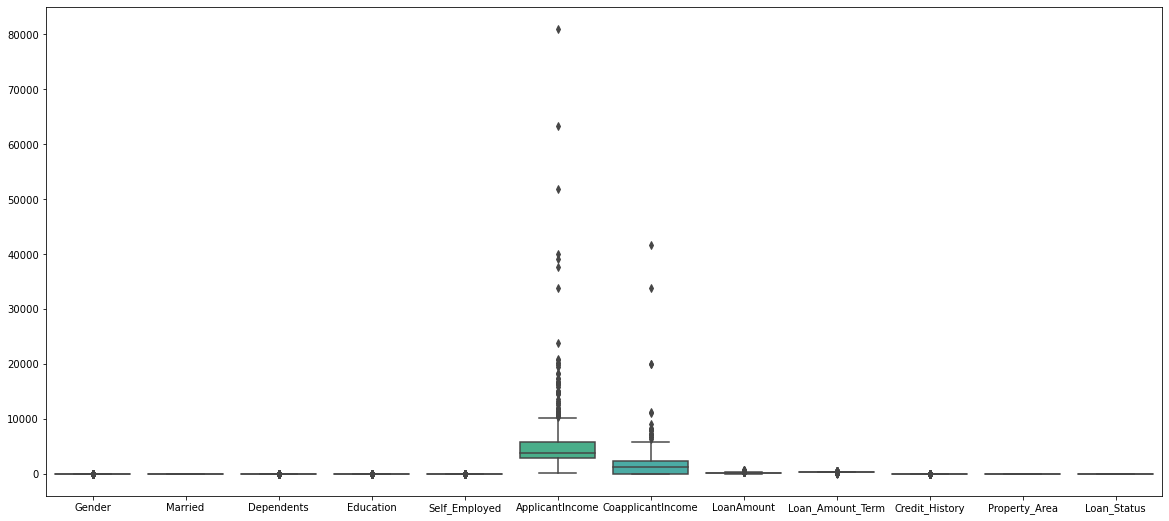

In [25]:
plt.figure(figsize=(20,9))
sns.boxplot(data=data)
plt.show()

 their is outlier in gender,education,self_Employed,ApplicantIncome,       
 CoapplicantIncome,LoanAmount,loan_Amount_Term,Credit_History         
 But Gender,Education,Self_Employed,LoanAmount_Term,Credit_History are the categorical variable         
 by boxplot or value counts function,so no need to do outlier treatment on that variable        
 Remaning columns are numeric - Applicantincome,Coapplicantincome,loan amount (need to do outlier treatment)

# outlier treatment for ApplicantIncome

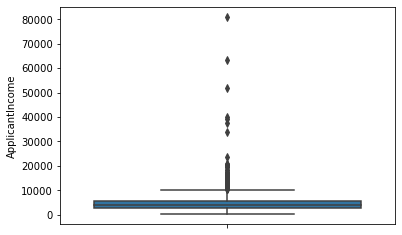

In [26]:
sns.boxplot(data=data,y="ApplicantIncome")
plt.show()

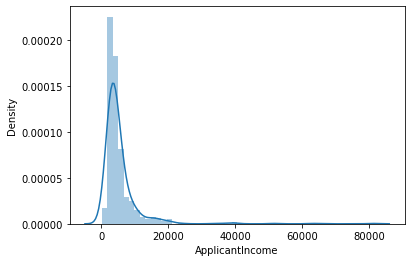

In [27]:
sns.distplot(data.ApplicantIncome)
plt.show()

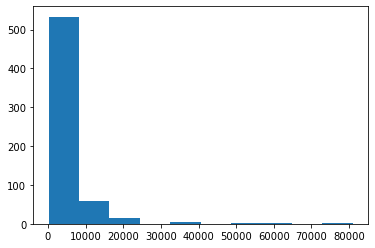

In [28]:
plt.hist(data.ApplicantIncome)
plt.show()

                                it is positive skewed 

In [29]:
data.ApplicantIncome.value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

   ApplicantIncome is numeric variable, and it is positive skewed so we use iqr method

In [30]:
iqr=data.ApplicantIncome.quantile(0.75)-data.ApplicantIncome.quantile(0.25)

In [31]:
ub=data.ApplicantIncome.quantile(0.75)+1.5*iqr
lb=data.ApplicantIncome.quantile(0.25)-1.5*iqr
print(lb,ub)

-1498.75 10171.25


In [32]:
data=data.loc[(data["ApplicantIncome"]<ub) & (data["ApplicantIncome"]>lb)]

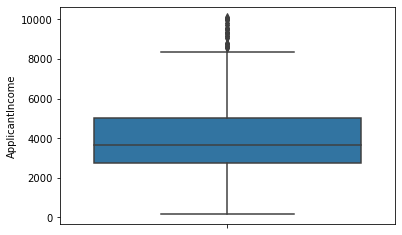

In [33]:
sns.boxplot(data=data,y="ApplicantIncome")
plt.show()

here, we can see that ourtilers of ApplicantIncome is preess to the upper bound.

# Coapplicantincome outliers treating

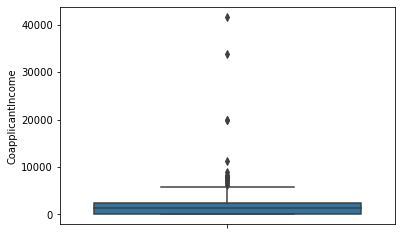

In [34]:
sns.boxplot(data=data,y="CoapplicantIncome")
plt.show()

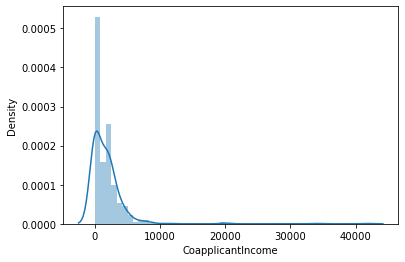

In [35]:
sns.distplot(data.CoapplicantIncome)
plt.show()

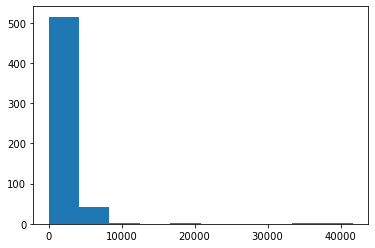

In [36]:
plt.hist(data.CoapplicantIncome)
plt.show()

it is also positively skewed so we use iqr method

In [37]:
iqr=data.CoapplicantIncome.quantile(0.75)-data.CoapplicantIncome.quantile(0.25)

In [38]:
ub=data.CoapplicantIncome.quantile(0.75)+1.5*iqr
lb=data.CoapplicantIncome.quantile(0.25)-1.5*iqr
print(lb,ub)

-3505.5 5842.5


In [39]:
data=data.loc[(data["CoapplicantIncome"]<ub) & (data["CoapplicantIncome"]>lb)]

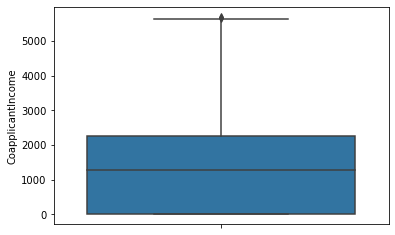

In [40]:
sns.boxplot(data=data,y="CoapplicantIncome")
plt.show()

# loan amount outlier treating

<AxesSubplot:ylabel='LoanAmount'>

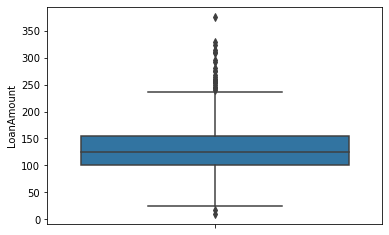

In [41]:
sns.boxplot(data=data,y="LoanAmount")

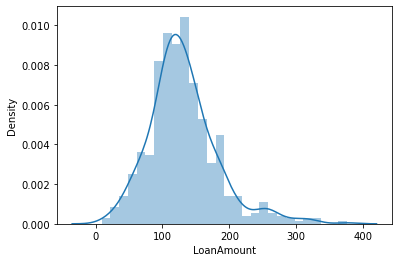

In [42]:
sns.distplot(data.LoanAmount)
plt.show()

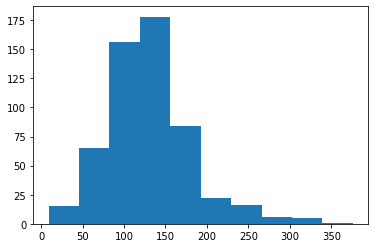

In [43]:
plt.hist(data.LoanAmount)
plt.show()

In [44]:
iqr=data.LoanAmount.quantile(0.75)-data.LoanAmount.quantile(0.25)

In [45]:
ub=data.LoanAmount.quantile(0.75)+1.5*iqr
lb=data.LoanAmount.quantile(0.25)-1.5*iqr
print(lb,ub)

17.5 237.5


In [46]:
data=data.loc[(data["LoanAmount"]<ub) & (data["LoanAmount"]>lb)]

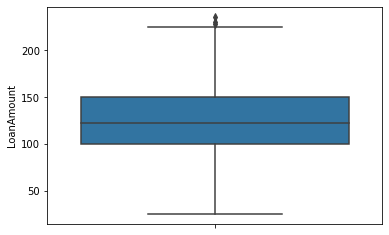

In [47]:
sns.boxplot(data=data,y="LoanAmount")
plt.show()

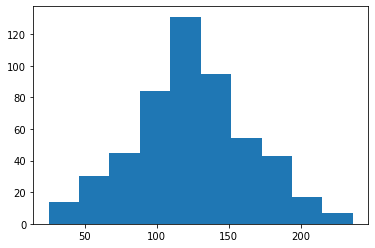

In [48]:
plt.hist(data.LoanAmount)
plt.show()

 here,all outliers are treated

# Machine learning

In [49]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [50]:
x=data.drop(["Loan_Status"],axis=1) #regressor,independent
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [51]:
y=data["Loan_Status"]    #response ,target,dependent variable
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 520, dtype: int32

# split data 20% for test and 80% to train

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((416, 11), (104, 11), (416,), (104,))

# 1.logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression 

In [56]:
lg=LogisticRegression()

In [57]:
lg.fit(x_train,y_train)

LogisticRegression()

In [58]:
lg_p=lg.predict(x_test)
lg_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(lg_p,y_test)
cm

array([[14,  0],
       [14, 76]], dtype=int64)

In [60]:
#accuracy :how often model predict correct output
#its ratio of how model is correct prediction made by classifier to the Number of PREDICTION MADE BY CLASSIFIER 
#C.P/T.P

In [61]:
lg_acc=(cm.diagonal().sum()/cm.sum())*100
lg_acc

86.53846153846155

In [62]:
lg_pre=precision_score(lg_p,y_test)           # #exact clasified
lg_pre

1.0

In [63]:
lg_re=recall_score(lg_p,y_test)               #complete classified
lg_re

0.8444444444444444

In [64]:
from sklearn.metrics import classification_report
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        14
           1       1.00      0.84      0.92        90

    accuracy                           0.87       104
   macro avg       0.75      0.92      0.79       104
weighted avg       0.93      0.87      0.88       104



here 87% accuracy

# 2.decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [66]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
dt_p=dt.predict(x_test)

In [68]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[15, 15],
       [13, 61]], dtype=int64)

In [69]:
dt_ac=(dt_cf.diagonal().sum()/dt_cf.sum())*100
dt_ac

73.07692307692307

In [70]:
dt_pr=precision_score(dt_p,y_test)      #exact clasified
dt_pr

0.8026315789473685

In [71]:
dt_re=recall_score(dt_p,y_test)      #exact clasified
dt_re

0.8243243243243243

In [72]:
from sklearn.metrics import classification_report
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52        30
           1       0.80      0.82      0.81        74

    accuracy                           0.73       104
   macro avg       0.67      0.66      0.67       104
weighted avg       0.73      0.73      0.73       104



  here 73% accuracy

# feature selection:-it is part of decision tree

In [73]:
dt.feature_importances_

array([0.01771562, 0.0169697 , 0.05587633, 0.01196367, 0.01506052,
       0.21304443, 0.10582568, 0.16036717, 0.07026288, 0.30721542,
       0.02569859])

In [74]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importance,columns
0,0.017716,Gender
1,0.016970,Married
2,0.055876,Dependents
3,0.011964,Education
4,0.015061,Self_Employed
5,0.213044,ApplicantIncome
6,0.105826,CoapplicantIncome
7,0.160367,LoanAmount
8,0.070263,Loan_Amount_Term
9,0.307215,Credit_History


here,we can see that Loan Amount is imporatant variables after that Credit history,Applicantincome,coapplicantincome is important variables

# 3.Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [76]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
rf_p=rf.predict(x_test)

In [78]:
cf=confusion_matrix(rf_p,y_test)
cf

array([[15,  6],
       [13, 70]], dtype=int64)

In [79]:
rf_acc=cf.diagonal().sum()/cf.sum()*100
rf_acc

81.73076923076923

In [80]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.9210526315789473

In [81]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.8433734939759037

In [82]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.71      0.61        21
           1       0.92      0.84      0.88        83

    accuracy                           0.82       104
   macro avg       0.73      0.78      0.75       104
weighted avg       0.84      0.82      0.83       104



it is show 78% accuracy

 # 4.KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=22)

In [84]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [85]:
k_p=knn.predict(x_test)

In [86]:
ck=confusion_matrix(k_p,y_test)
ck

array([[ 1,  3],
       [27, 73]], dtype=int64)

In [87]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

71.15384615384616

In [88]:
k_pr=precision_score(k_p,y_test)
k_pr

0.9605263157894737

In [89]:
k_re=recall_score(k_p,y_test)
k_re

0.73

In [90]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.04      0.25      0.06         4
           1       0.96      0.73      0.83       100

    accuracy                           0.71       104
   macro avg       0.50      0.49      0.45       104
weighted avg       0.92      0.71      0.80       104



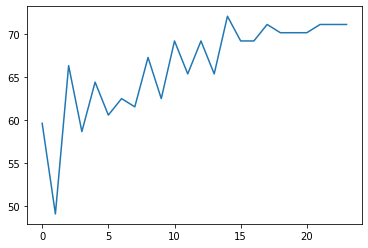

In [91]:
lst=list()
for i in range (1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)
    
import matplotlib.pyplot as plt
p=plt.plot(lst)

it show 71% accuracy

# 5. SVM

In [92]:
from sklearn.svm import SVC
svc=SVC()

In [93]:
svc.fit(x_train,y_train)

SVC()

In [94]:
s_p=svc.predict(x_test)
s_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [95]:
cs=confusion_matrix(s_p,y_test)
cs

array([[ 0,  0],
       [28, 76]], dtype=int64)

In [96]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

73.07692307692307

In [97]:
s_pr=precision_score(s_p,y_test)
s_pr

1.0

In [98]:

s_re=recall_score(s_p,y_test)
s_re

0.7307692307692307

In [99]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.73      0.84       104

    accuracy                           0.73       104
   macro avg       0.50      0.37      0.42       104
weighted avg       1.00      0.73      0.84       104



it show 73% accuracy

# 6.gaussian Navie bays

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
nb = GaussianNB()

In [102]:
nb_f=nb.fit(x_train,y_train)

In [103]:
nb_p=nb.predict(x_test)

In [104]:
cf=confusion_matrix(nb_p,y_test)
cf

array([[14,  0],
       [14, 76]], dtype=int64)

In [105]:
acc_nb=(cf.diagonal().sum()/cf.sum())*100
acc_nb

86.53846153846155

In [106]:
pre_nb=precision_score(nb_p,y_test)
pre_nb

1.0

In [107]:
re_nb=recall_score(nb_p,y_test)
re_nb

0.8444444444444444

In [108]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        14
           1       1.00      0.84      0.92        90

    accuracy                           0.87       104
   macro avg       0.75      0.92      0.79       104
weighted avg       0.93      0.87      0.88       104



In [ ]:
it gives 87% accuracy

# 7. Bagging

In [128]:
from sklearn.ensemble import BaggingClassifier

In [129]:
base_estimator = DecisionTreeClassifier()
bg= BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [130]:
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [131]:
bg_p=bg.predict(x_test)

In [132]:
bg_cf=confusion_matrix(bg_p,y_test)
bg_cf

array([[15,  7],
       [13, 69]], dtype=int64)

In [133]:
bg_acc=(bg_cf.diagonal().sum()/bg_cf.sum())*100
bg_acc

80.76923076923077

In [134]:
bg_pre=precision_score(bg_p,y_test)
bg_pre

0.9078947368421053

In [135]:
bg_re=recall_score(bg_p,y_test)
bg_re

0.8414634146341463

In [136]:
bg_fc=f1_score(bg_p,y_test)
bg_fc

0.8734177215189874

In [137]:
print(classification_report(bg_p,y_test))

              precision    recall  f1-score   support

           0       0.54      0.68      0.60        22
           1       0.91      0.84      0.87        82

    accuracy                           0.81       104
   macro avg       0.72      0.76      0.74       104
weighted avg       0.83      0.81      0.82       104



it show 81% accuracy

# MAKE DATAFRAME FOR COMPARE RESULT

In [200]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","Guassian naeive bays","BaggingClassifier"]
list2=[lg_acc,dt_ac,rf_acc,kacc,acc_s,acc_nb,bg_acc]
list3=[lg_pre,dt_pr,rf_pr,k_pr,s_pr,pre_nb,bg_pre]
list4=[lg_re,dt_re,rf_re,k_re,s_re,re_nb,bg_re]

In [201]:
df=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4})
df

,Model Name,Accuracy,Precision,Recall
0,LOGISTIC REGRESSION,86.538462,1.000000,0.844444
1,DECISION TREE,73.076923,0.802632,0.824324
2,RANDOM FOREST,81.730769,0.921053,0.843373
3,KNN,71.153846,0.960526,0.730000
4,SVM,73.076923,1.000000,0.730769
5,Guassian naeive bays,86.538462,1.000000,0.844444
6,BaggingClassifier,80.769231,0.907895,0.841463


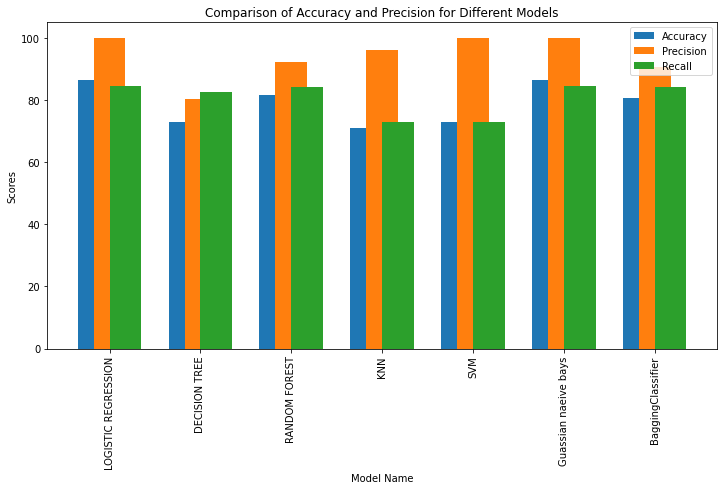

In [202]:
# Create an array for the x-axis positions
df['Accuracy']=df['Accuracy']
df['Precision']=df['Precision']*100
df['Recall']=df['Recall']*100
x = np.arange(len(df))
#to increase figure size
plt.figure(figsize=(12, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x , df['Precision'], width=bar_width, label='Precision')
plt.bar(x + bar_width/2, df['Recall'], width=bar_width, label='Recall')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy and Precision for Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

 INTERPRETATION:- from above dataframe, logistic regression and Guassian naeive bays gives more good results
 i.e logistic regression having 86.53% accuracy with 85% precision and 69% precision
 and naive bayes gives 68.29% accuracy with 82% precision and 70% recall.
 hence, we can say our data is underfitted 
 we are not satisfited with our result, it giving very low results maybe coz of data imbalance problem,
To takle this problem we go for oversampling.

# RandomOverSampling

In [151]:
data.Loan_Status.value_counts()

1    362
0    158
Name: Loan_Status, dtype: int64

In [152]:
c_1,c_0=data["Loan_Status"].value_counts()
c_1,c_0

(362, 158)

In [153]:
train_0=data[data["Loan_Status"]==0]
train_1=data[data["Loan_Status"]==1]

In [154]:
train_0.shape,train_1.shape

((158, 12), (362, 12))

In [155]:
class_0over=train_0.sample(c_1,replace=True)

In [156]:
class0_1=pd.concat([class_0over,train_1],axis=0)

In [157]:
class0_1.shape

(724, 12)

In [158]:
class0_1.Loan_Status.value_counts()

0    362
1    362
Name: Loan_Status, dtype: int64

In [159]:
o_x=class0_1.iloc[:,1:-1]
o_y=class0_1.iloc[:,-1]

In [160]:
o_x_train,o_x_test,o_y_train,o_y_test=train_test_split(o_x,o_y,test_size=0.2,random_state=100)
o_x_train.shape,o_x_test.shape,o_y_train.shape,o_y_test.shape

((579, 10), (145, 10), (579,), (145,))

# 1.Logistic Reg with Random Oversampling

In [161]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(o_x_train,o_y_train)

LogisticRegression()

In [162]:
lg_p=lg.predict(o_x_test)

In [163]:
lg_cf=confusion_matrix(lg_p,o_y_test)
lg_cf

array([[40, 10],
       [36, 59]], dtype=int64)

In [164]:
lg_acc1=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_acc1

68.27586206896552

In [165]:
lg_pre1=precision_score(lg_p,o_y_test)
lg_pre1

0.855072463768116

In [166]:
lg_re1=recall_score(lg_p,o_y_test)
lg_re1

0.6210526315789474

In [167]:
lg_fc1=f1_score(lg_p,o_y_test)
lg_fc1

0.7195121951219512

In [168]:
print(classification_report(lg_p,o_y_test))

              precision    recall  f1-score   support

           0       0.53      0.80      0.63        50
           1       0.86      0.62      0.72        95

    accuracy                           0.68       145
   macro avg       0.69      0.71      0.68       145
weighted avg       0.74      0.68      0.69       145



it show 68% accuracy

# 2.decision tree

In [169]:
dt.fit(o_x_train,o_y_train)

DecisionTreeClassifier()

In [170]:
dt_op=dt.predict(o_x_test)

In [171]:
dt_cf=confusion_matrix(dt_op,o_y_test)
dt_cf

array([[72, 11],
       [ 4, 58]], dtype=int64)

In [172]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

89.65517241379311

In [173]:
dt_pre1=precision_score(dt_op,o_y_test)
dt_pre1

0.8405797101449275

In [174]:
dt_re1=recall_score(dt_op,o_y_test)
dt_re1

0.9354838709677419

In [175]:
dt_fc1=f1_score(dt_op,o_y_test)
dt_fc1

0.8854961832061068

In [176]:
print(classification_report(dt_op,o_y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        83
           1       0.84      0.94      0.89        62

    accuracy                           0.90       145
   macro avg       0.89      0.90      0.90       145
weighted avg       0.90      0.90      0.90       145



it show 90% accuracy

# Hyperparameter tuning (RANDOMISEDCV, GRIDSEARCHCV)

The main parameters used by a Decision Tree Classifier are:          

criterion = the function used to evaluate the quality of a split.        
max_depth = maximum number of levels allowed in each tree.                  
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.       
min_samples_split = minimum number of samples necessary in a node to cause node splitting.      
n_estimators = number of trees in the ensamble.

# Gridsearchcv Decision Tree

In [178]:
from sklearn.model_selection import GridSearchCV
pg={'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
gsm2=GridSearchCV(estimator=dt,param_grid=pg,cv=100,verbose=3,scoring='accuracy',n_jobs=-1)
gsm2.fit(o_x_train,o_y_train)

Fitting 100 folds for each of 108 candidates, totalling 10800 fits


GridSearchCV(cv=100, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=3)

In [179]:
y2_predict=gsm2.predict(o_x_test)

In [180]:
A2=dt_grt_accuracy=accuracy_score(o_y_test,y2_predict)
P2=dt_grt_precision=precision_score(o_y_test,y2_predict)
R2=dt_grt_recall=recall_score(o_y_test,y2_predict)
print(A2)
print(P2)
print(R2)

0.903448275862069
0.9508196721311475
0.8405797101449275


# 3.random forest

In [181]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [182]:
rf.fit(o_x_train,o_y_train)

RandomForestClassifier()

In [183]:
rf_p=rf.predict(o_x_test)

In [184]:
cf=confusion_matrix(rf_p,o_y_test)
cf

array([[72,  9],
       [ 4, 60]], dtype=int64)

In [185]:
rf_acc1=cf.diagonal().sum()/cf.sum()*100
rf_acc1

91.0344827586207

In [186]:
rf_pr1=precision_score(rf_p,o_y_test)
rf_pr1

0.8695652173913043

In [187]:
rf_re1=recall_score(rf_p,o_y_test)
rf_re1

0.9375

In [188]:
rf_fc1=f1_score(rf_p,o_y_test)
rf_fc1

0.9022556390977444

In [189]:
print(classification_report(rf_p,o_y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        81
           1       0.87      0.94      0.90        64

    accuracy                           0.91       145
   macro avg       0.91      0.91      0.91       145
weighted avg       0.91      0.91      0.91       145



it show 88% accuracy

# 4.KNN

In [211]:
from sklearn.neighbors import KNeighborsClassifier

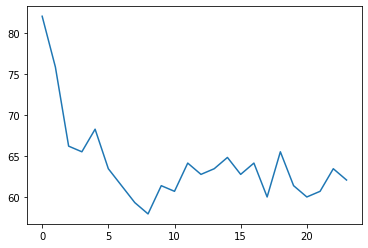

In [212]:
lst=list()
for i in range (1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(o_x_train,o_y_train)
    kn_pred=knn.predict(o_x_test)
    cf_k=confusion_matrix(kn_pred,o_y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)
    
import matplotlib.pyplot as plt
p=plt.plot(lst)

In [213]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(o_x_train,o_y_train)

KNeighborsClassifier(n_neighbors=2)

In [214]:
k_p=knn.predict(o_x_test)

In [215]:
ck=confusion_matrix(k_p,o_y_test)
ck

array([[73, 32],
       [ 3, 37]], dtype=int64)

In [216]:
kacc1=ck.diagonal().sum()/ck.sum()*100
kacc1

75.86206896551724

In [217]:
k_pr1=precision_score(k_p,o_y_test)
k_pr1

0.5362318840579711

In [218]:
k_re1=recall_score(k_p,o_y_test)
k_re1

0.925

In [219]:
k_fc1=f1_score(k_p,o_y_test)
k_fc1

0.6788990825688074

In [220]:
print(classification_report(k_p,o_y_test))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81       105
           1       0.54      0.93      0.68        40

    accuracy                           0.76       145
   macro avg       0.75      0.81      0.74       145
weighted avg       0.84      0.76      0.77       145



 it show 76% accuracy

# 5. SVM

In [221]:
from sklearn.svm import SVC
svc=SVC()

In [222]:
svc.fit(o_x_train,o_y_train)

SVC()

In [223]:
s_p=svc.predict(o_x_test)
s_p

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [224]:
cs=confusion_matrix(s_p,o_y_test)
cs

array([[37, 26],
       [39, 43]], dtype=int64)

In [225]:
acc_s1=(cs.diagonal().sum()/cs.sum())*100
acc_s1

55.172413793103445

In [226]:
s_pr1=precision_score(s_p,o_y_test)
s_pr1

0.6231884057971014

In [227]:
s_re1=recall_score(s_p,o_y_test)
s_re1

0.524390243902439

In [228]:
s_fc1=f1_score(s_p,o_y_test)
s_fc1

0.5695364238410596

In [229]:
print(classification_report(s_p,o_y_test))

              precision    recall  f1-score   support

           0       0.49      0.59      0.53        63
           1       0.62      0.52      0.57        82

    accuracy                           0.55       145
   macro avg       0.56      0.56      0.55       145
weighted avg       0.56      0.55      0.55       145



it show 55% accuracy

# 6.gaussian Navie bays

In [230]:
from sklearn.naive_bayes import GaussianNB

In [231]:
nb = GaussianNB()

In [232]:
nb_f=nb.fit(o_x_train,o_y_train)

In [233]:
nb_p=nb.predict(o_x_test)

In [234]:
cf=confusion_matrix(nb_p,o_y_test)
cf

array([[40,  3],
       [36, 66]], dtype=int64)

In [235]:
acc_nb1=(cf.diagonal().sum()/cf.sum())*100
acc_nb1

73.10344827586206

In [236]:
pre_nb1=precision_score(nb_p,o_y_test)
pre_nb1

0.9565217391304348

In [237]:
re_nb1=recall_score(nb_p,o_y_test)
re_nb1

0.6470588235294118

In [238]:
fc_nb1=f1_score(nb_p,o_y_test)
fc_nb1

0.7719298245614036

In [239]:
print(classification_report(nb_p,o_y_test))

              precision    recall  f1-score   support

           0       0.53      0.93      0.67        43
           1       0.96      0.65      0.77       102

    accuracy                           0.73       145
   macro avg       0.74      0.79      0.72       145
weighted avg       0.83      0.73      0.74       145



it show 73% accuracy

# 7.BaggingClassifier
The Bagging Classifier is a powerful tool for reducing variance and avoiding overfitting, particularly useful with high variance algorithms like decision trees. By training multiple models on different subsets of the data and combining their predictions, bagging can provide more robust and stable predictions.

In [240]:
from sklearn.ensemble import BaggingClassifier

In [241]:
base_estimator = DecisionTreeClassifier()
bg= BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [242]:
bg.fit(o_x_train,o_y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [243]:
bg_p=bg.predict(o_x_test)

In [244]:
bg_cf=confusion_matrix(bg_p,o_y_test)
bg_cf

array([[73, 10],
       [ 3, 59]], dtype=int64)

In [245]:
bg_acc1=(bg_cf.diagonal().sum()/bg_cf.sum())*100
bg_acc1

91.0344827586207

In [246]:
bg_pre1=precision_score(bg_p,o_y_test)
bg_pre1

0.855072463768116

In [247]:
bg_re1=recall_score(bg_p,o_y_test)
bg_re1

0.9516129032258065

In [248]:
bg_fc1=f1_score(bg_p,o_y_test)
bg_fc1

0.900763358778626

In [249]:
print(classification_report(bg_p,o_y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        83
           1       0.86      0.95      0.90        62

    accuracy                           0.91       145
   macro avg       0.91      0.92      0.91       145
weighted avg       0.92      0.91      0.91       145



it show  91% accuracy

# MAKE DATAFRAME FOR COMPARE RESULT

In [250]:
list6=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","Guassian naeive bays","Bagging "]
list7=[lg_acc1,dt_acc1,rf_acc1,kacc1,acc_s1,acc_nb1,bg_acc1]
list8=[lg_pre1,dt_pre1,rf_pr1,k_pr1,s_pr1,pre_nb1,bg_pre1]
list9=[lg_re1,dt_re1,rf_re1,k_re1,s_re1,re_nb1,bg_re1]
list10=[lg_fc1,dt_fc1,rf_fc1,k_fc1,s_fc1,fc_nb1,bg_fc1]

In [251]:
df1=pd.DataFrame({"Model Name":list6,"Accuracy":list7,"Precision":list8,"Recall":list9,"F1 score":list10})
df1

,Model Name,Accuracy,Precision,Recall,F1 score
0,LOGISTIC REGRESSION,68.275862,0.855072,0.621053,0.719512
1,DECISION TREE,89.655172,0.840580,0.935484,0.885496
2,RANDOM FOREST,91.034483,0.869565,0.937500,0.902256
3,KNN,75.862069,0.536232,0.925000,0.678899
4,SVM,55.172414,0.623188,0.524390,0.569536
5,Guassian naeive bays,73.103448,0.956522,0.647059,0.771930
6,Bagging,91.034483,0.855072,0.951613,0.900763


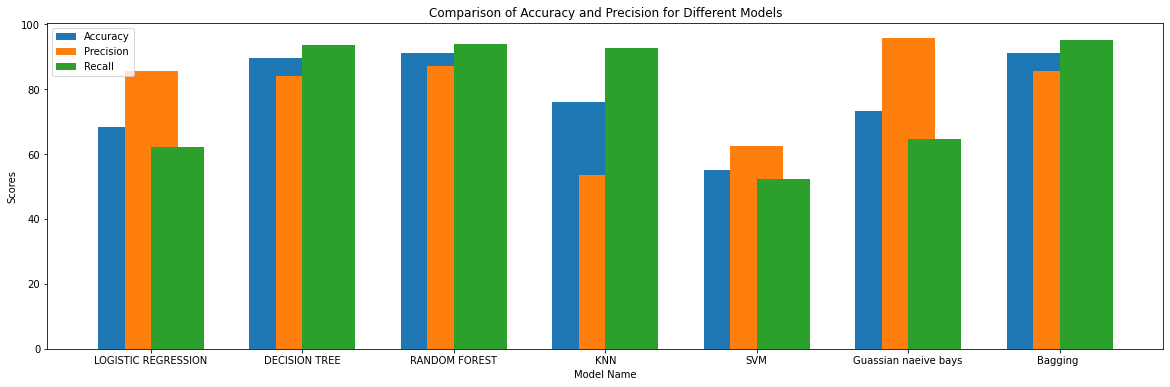

In [252]:
# Create an array for the x-axis positions
df1['Accuracy']=df1['Accuracy']
df1['Precision']=df1['Precision']*100
df1['Recall']=df1['Recall']*100
x = np.arange(len(df1))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df1['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x , df1['Precision'], width=bar_width, label='Precision')
plt.bar(x + bar_width/2, df1['Recall'], width=bar_width, label='Recall')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy and Precision for Different Models')
plt.xticks(x, df1['Model Name'])
plt.legend()

# Display the plot
plt.show()

# Comparison of Accuracy

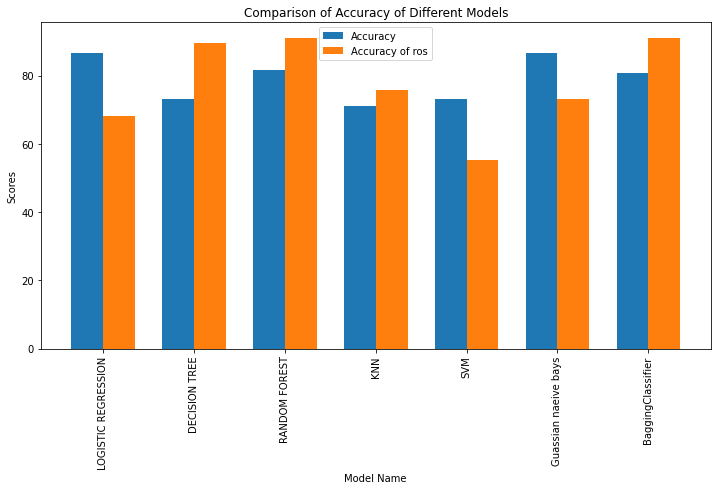

In [253]:
# Create an array for the x-axis positions
df['Accuracy']=df['Accuracy']
df1['Accuracy']=df1['Accuracy']
x = np.arange(len(df))
#to increase figure size
plt.figure(figsize=(12, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x + bar_width/2, df1['Accuracy'], width=bar_width, label='Accuracy of ros')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Accuracy of Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

# Comparison of Precision

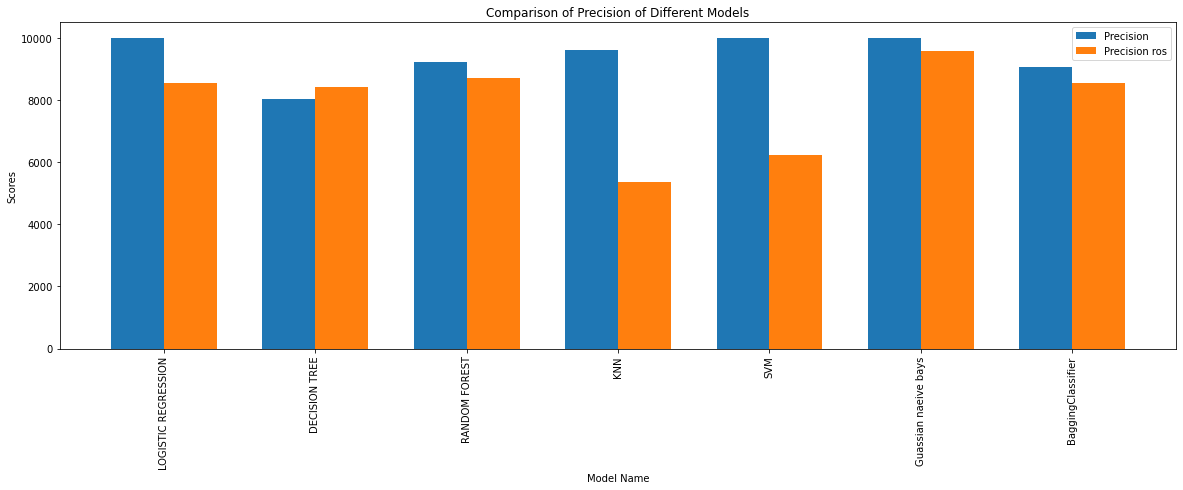

In [254]:
# Create an array for the x-axis positions
df['Precision']=df['Precision']*100
df1['Precision']=df1['Precision']*100
x = np.arange(len(df1))
#to increase figure size
plt.figure(figsize=(20, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Precision'], width=bar_width, label='Precision')
plt.bar(x + bar_width/2, df1['Precision'], width=bar_width, label='Precision ros')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Precision of Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()

# Comparison of Recall

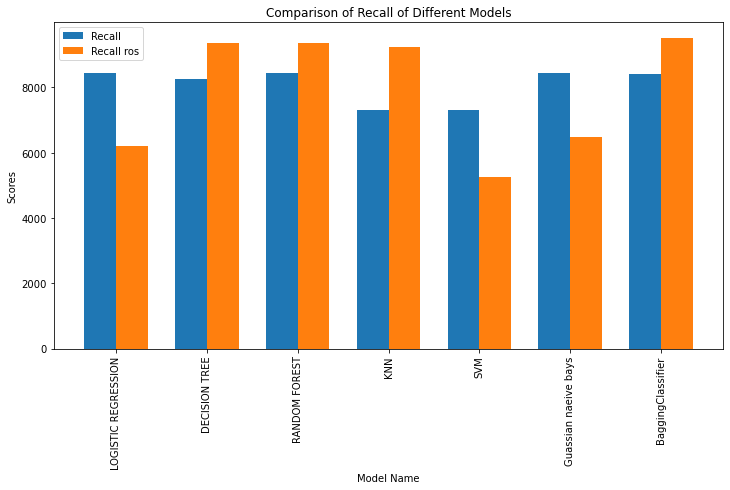

In [255]:
# Create an array for the x-axis positions
df['Recall']=df['Recall']*100
df1['Recall']=df1['Recall']*100
x = np.arange(len(df))
#to increase figure size
plt.figure(figsize=(12, 6))


# Set the width of the bars
bar_width = 0.35

# Plotting the joint bar plot
plt.bar(x - bar_width/2, df['Recall'], width=bar_width, label='Recall')
plt.bar(x + bar_width/2, df1['Recall'], width=bar_width, label='Recall ros')
# Adding labels and title
plt.xlabel('Model Name')
plt.ylabel('Scores')
plt.title('Comparison of Recall of Different Models')
plt.xticks(x, df['Model Name'],rotation="vertical")
plt.legend()

# Display the plot
plt.show()